In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set()

### Loading the datasets

In [476]:
df = pd.read_excel('Dataset/Regression/well_logs.xlsx', sheet_name='log1')
df.head()

,Central Swamp\nDepobelt,SPADE Analysis Plot Data,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Conduits,Sonic Data for \nSand Producing\nConduits ( Sa...,"Total\nDrawdown , Psi",TWC,"BHN,kg/mm2","UCS, psi","Depth,ft"
1,1,114,250,29.620644,4.026963,1752.958059,5990.837748
2,2,97,120,90.527498,8.085017,2058.326925,8274.936604
3,3,103,800,55.715313,6.321854,1944.908788,7383.378019
4,4,97,100,90.527498,8.085017,2058.326925,8274.936604


In [477]:
df['SPADE Analysis Plot Data'].iloc[0]

'Sonic Data for \nSand Producing\nConduits ( Sand > 5\npptb )'

In [478]:
df.columns

Index(['Central Swamp\nDepobelt', 'SPADE Analysis Plot Data', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [479]:
## Renaming the columns
df = df.rename(columns={'Central Swamp\nDepobelt': 'conduits', 'SPADE Analysis Plot Data': 'transit_time', 'Unnamed: 2': 'total_draw_down', 'Unnamed: 3': 'thick_walled_cyl_strength', 'Unnamed: 4': 'brinell_hardness_number', 'Unnamed: 5': 'unconfined_comprehensive_strength', 'Unnamed: 6': 'depth'})
df = df.iloc[1: , :]
df.head()

,conduits,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
1,1,114,250,29.620644,4.026963,1752.958059,5990.837748
2,2,97,120,90.527498,8.085017,2058.326925,8274.936604
3,3,103,800,55.715313,6.321854,1944.908788,7383.378019
4,4,97,100,90.527498,8.085017,2058.326925,8274.936604
5,5,103,120,55.715313,6.321854,1944.908788,7383.378019


In [480]:
df.shape

(756, 7)

In [481]:
# Checking for missing values

df.isnull().sum()

conduits                             0
transit_time                         0
total_draw_down                      0
thick_walled_cyl_strength            0
brinell_hardness_number              0
unconfined_comprehensive_strength    0
depth                                0
dtype: int64

In [482]:
# Checking for duplicate values

df.duplicated().sum()

2

In [483]:
# Dropping the duplicates

df = df.drop_duplicates()

df.duplicated().sum()

0

In [484]:
# Checking the datatypes

df.dtypes

conduits                             object
transit_time                         object
total_draw_down                      object
thick_walled_cyl_strength            object
brinell_hardness_number              object
unconfined_comprehensive_strength    object
depth                                object
dtype: object

In [485]:
df.brinell_hardness_number.unique()

array([4.026963239593587, 8.085016657657857, 6.321854213515379,
       5.5901859610186655, 4.943198312286446, 3.8651966225908843,
       4.195500130124826, 6.862093384955682, 14.353768964690222,
       10.339924355556482, 16.23245370404774, 4.5540299913846205,
       7.44849913229306, 4.74462573524133, 5.824147013878074,
       8.423391628151117, 5.365623327210944, 9.924560597919834,
       7.760234504133206, 7.1492864415657795, 10.77267196101751,
       8.775928303623406, 0.13959813523526168, 3.7099283113385777,
       13.777165576850335, 6.067899829415291, 9.143219381246212,
       5.150081569784497, 9.525882363815601, 11.223530964936844,
       6.586437123302557, 11.693259367474337, 19.925743787572976,
       14.954504418375866, 15.58038191567407, 12.692516316268813,
       3.1487720559961265, 18.357029007658962, 3.417852922009929,
       13.223724848775017, 12.182646892692539, 4.37109064438688,
       16.911816069731653, 21.62851435939613, 20.759678119642665,
       17.619611180847

In [486]:
df.unconfined_comprehensive_strength.unique()

array([1752.9580589175148, 2058.326924699698, 1944.9087879881547,
       1890.5652914090049, 1837.7402288246456, 1736.4768823601155,
       1769.5956609266295, 1982.0028628565171, 2349.36030470195,
       2178.3590855827424, 2416.891669136662, 1803.3460940258817,
       2019.804410691652, 1820.461936840525, 1908.5089454118463,
       2077.8628308804464, 1872.790342258057, 2157.878321361222,
       2038.9746936030954, 2000.814365302557, 2199.034235974672,
       2097.584155434594, 807.9136300596136, 1720.150660554391,
       2327.2718001985113, 1926.6229054709968, 2117.4926581972304,
       1855.1825118089887, 2137.590115706318, 2219.905617486879,
       1963.3682247065426, 2240.9750925799403, 2533.7851219477407,
       2371.658454692932, 2394.168239949916, 2283.7158619032584,
       1656.3663880851882, 2486.364193968649, 1687.9572674048438,
       2305.390970111901, 2262.2445413913442, 1786.391173046146,
       2439.8307699814777, 2582.1104807482916, 2557.8336770293236,
       2462.987

In [487]:
# # Replacing the 'I' in Brinell's hardness number with NAN
# df['brinell_hardness_number'] = df['brinell_hardness_number'].replace('l', np.nan)

# df['brinell_hardness_number'] = df['brinell_hardness_number'].fillna(df['brinell_hardness_number'].mean())
# df.brinell_hardness_number.unique()

In [488]:
warnings.filterwarnings('ignore')
df['transit_time'] = pd.to_datetime(df['transit_time'])
df['transit_time'] = df['transit_time'].astype('int64')
df['total_draw_down'] =  df['total_draw_down'].astype(int)
df['unconfined_comprehensive_strength'] = df['unconfined_comprehensive_strength'].astype(float)
df['thick_walled_cyl_strength'] = df['thick_walled_cyl_strength'].astype(float)
df['brinell_hardness_number'] = df['brinell_hardness_number'].astype(float)
df['depth'] = df['depth'].astype(float)

In [489]:
df.dtypes

conduits                              object
transit_time                           int64
total_draw_down                        int32
thick_walled_cyl_strength            float64
brinell_hardness_number              float64
unconfined_comprehensive_strength    float64
depth                                float64
dtype: object

In [490]:
df.head()

,conduits,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
1,1,114,250,29.620644,4.026963,1752.958059,5990.837748
2,2,97,120,90.527498,8.085017,2058.326925,8274.936604
3,3,103,800,55.715313,6.321854,1944.908788,7383.378019
4,4,97,100,90.527498,8.085017,2058.326925,8274.936604
5,5,103,120,55.715313,6.321854,1944.908788,7383.378019


In [491]:
df.dtypes

conduits                              object
transit_time                           int64
total_draw_down                        int32
thick_walled_cyl_strength            float64
brinell_hardness_number              float64
unconfined_comprehensive_strength    float64
depth                                float64
dtype: object

In [492]:
# Dropping the conduits column

df = df.drop('conduits', axis=1)
df.head()

,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
1,114,250,29.620644,4.026963,1752.958059,5990.837748
2,97,120,90.527498,8.085017,2058.326925,8274.936604
3,103,800,55.715313,6.321854,1944.908788,7383.378019
4,97,100,90.527498,8.085017,2058.326925,8274.936604
5,103,120,55.715313,6.321854,1944.908788,7383.378019


In [493]:
df.shape

(754, 6)

### ANALYSIS AND VISUALIZATIONS

#### Descriptive Statistics to understand the data better

In [494]:
df.describe()

,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000
mean,96.553050,1243.364721,209.659240,8.902051,2076.142764,8491.655848
std,10.101108,876.905013,423.344666,3.485927,190.545680,1544.508469
min,72.000000,30.000000,10.158187,0.139598,807.913630,1261.411409
25%,90.000000,400.000000,52.893653,6.131388,1931.194376,7279.158107
50%,96.000000,1200.000000,99.365829,8.423392,2077.862831,8433.663530
75%,103.750000,2000.000000,189.723008,10.772672,2199.034236,9452.046322
max,196.000000,3500.000000,4833.759542,22.533713,2606.617699,13306.215543


#### What is the ditribution of the  Total Draw Down?

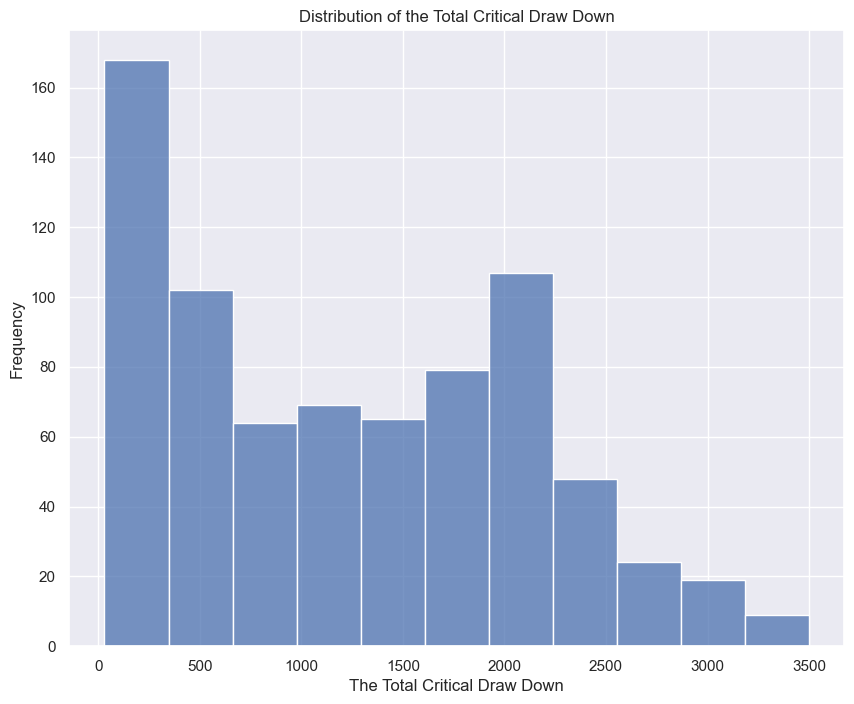

<function warnings.resetwarnings()>

In [495]:
warnings.filterwarnings('ignore', module='seaborn')

plt.figure(figsize=(10, 8))

sns.histplot(df['total_draw_down'])
plt.xlabel('The Total Critical Draw Down')
plt.ylabel('Frequency')
plt.title('Distribution of the Total Critical Draw Down')
plt.show()

warnings.resetwarnings

<Axes: title={'center': 'Distribution of the the Critical Total Draw Down'}, ylabel='total_draw_down'>

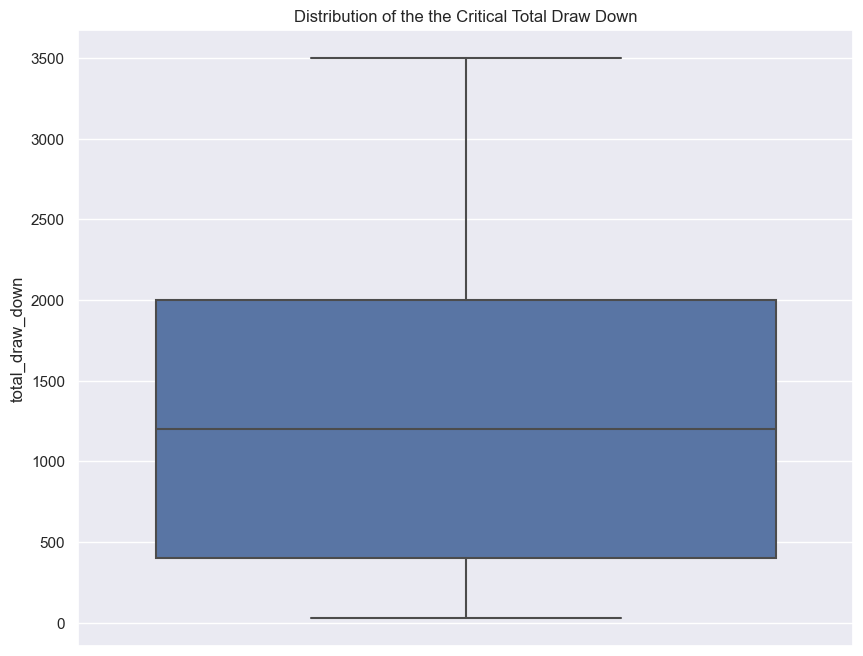

In [496]:
warnings.filterwarnings('ignore', module='seaborn')
plt.figure(figsize=(10, 8))
plt.title('Distribution of the the Critical Total Draw Down')
plt.ylabel('Critical Total Draw Down')
sns.boxplot(data=df, y='total_draw_down')

#### What is the relationship between the Critical Total Draw Down and the Thick Walled Cylinder Strength

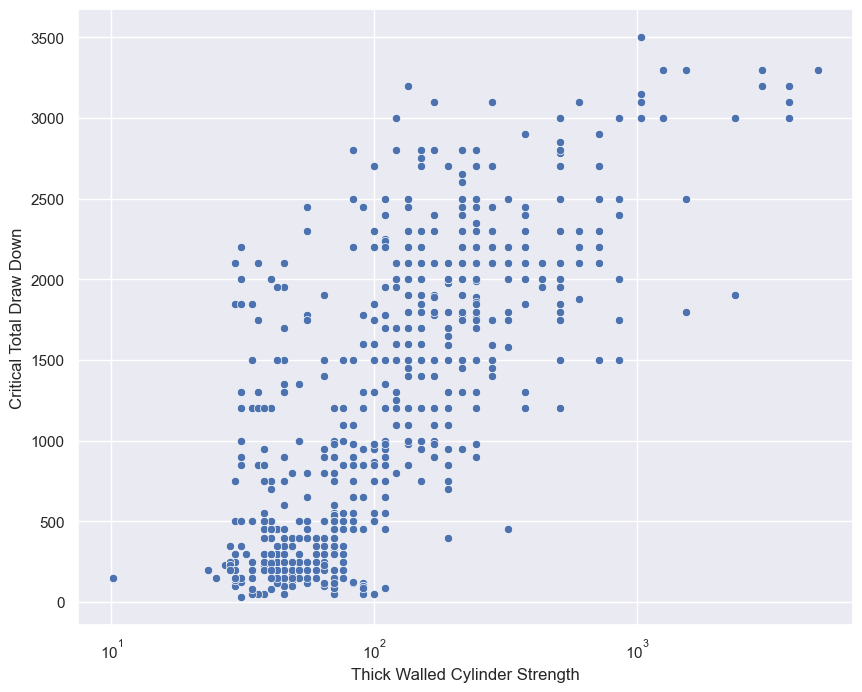

In [497]:
warnings.filterwarnings('ignore', module='seaborn')
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='thick_walled_cyl_strength', y='total_draw_down')
plt.xlabel('Thick Walled Cylinder Strength')
plt.ylabel('Critical Total Draw Down')
plt.xscale('log')

In [498]:
df.total_draw_down.corr(df.thick_walled_cyl_strength)

0.48311502334604267

In [499]:
df.total_draw_down.corr(np.log(df['thick_walled_cyl_strength']))

0.7501360872699705

- The correlation of the Critical Total Draw Down and the Thick Walled Cylinder Strenth is low
- After performing a log transformation on the Thick Walled Cylinder Strenth, the correlation increased to  about 0.55. This is a great  positive correlation

In [500]:
df.columns

Index(['transit_time', 'total_draw_down', 'thick_walled_cyl_strength',
       'brinell_hardness_number', 'unconfined_comprehensive_strength',
       'depth'],
      dtype='object')

#### What is the correlation between the Critical Total Draw Down and the Brinell Hardness Number?

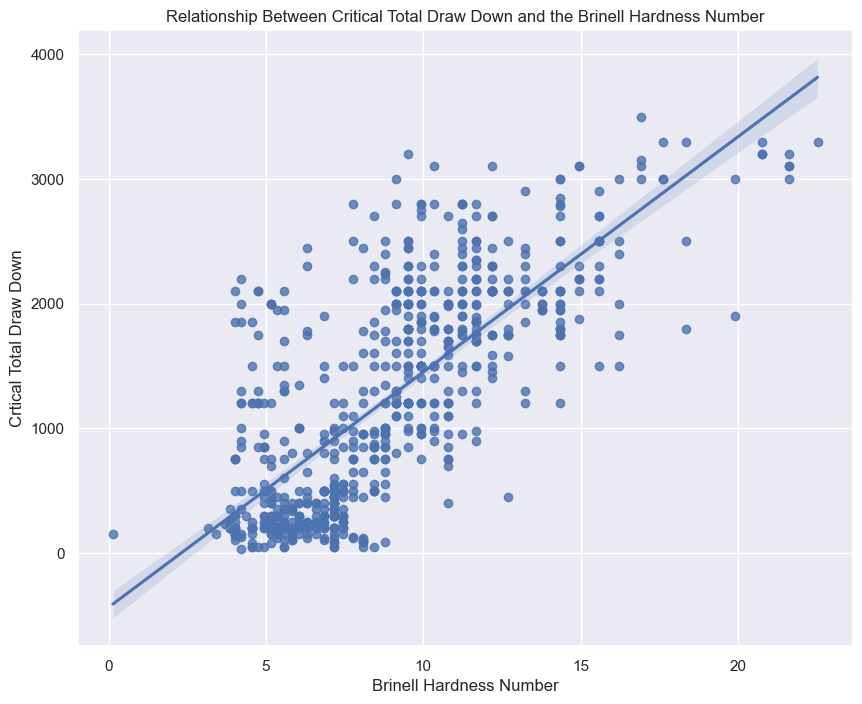

In [501]:
warnings.filterwarnings('ignore', module='seaborn')

plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='brinell_hardness_number', y='total_draw_down')
plt.title('Relationship Between Critical Total Draw Down and the Brinell Hardness Number')
plt.xlabel('Brinell Hardness Number')
plt.ylabel('Crtical Total Draw Down');

In [502]:
df.total_draw_down.corr(df.brinell_hardness_number)

0.7501360872699708

- There is a positive correlation between the Critical Total Draw Down and Brinell Hardness Number

### What is the relationship between Critical Total Draw Down and Unconfined Comprehensive Strength

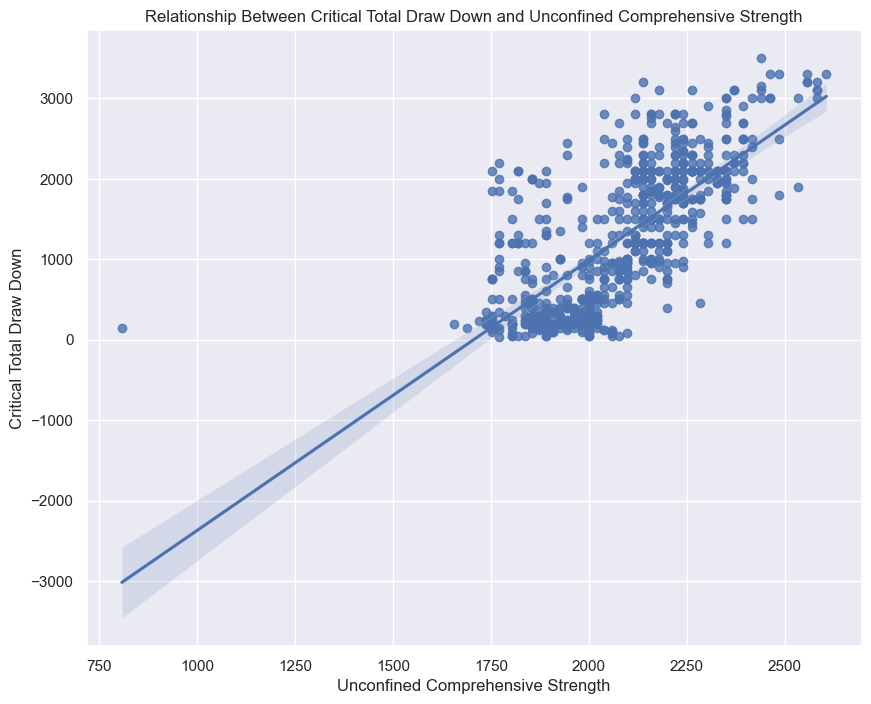

In [503]:
warnings.filterwarnings('ignore', module='seaborn')

plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='unconfined_comprehensive_strength', y='total_draw_down')
plt.title('Relationship Between Critical Total Draw Down and Unconfined Comprehensive Strength')
plt.xlabel('Unconfined Comprehensive Strength')
plt.ylabel('Critical Total Draw Down');

In [504]:
df.total_draw_down.corr(df.unconfined_comprehensive_strength)

0.7300163211407135

- There is a positive correlation between the Critical Total  Draw Down and the Unconfined Comprehensive Strength

### Relationship Between Critical Total Draw Down and the Depth

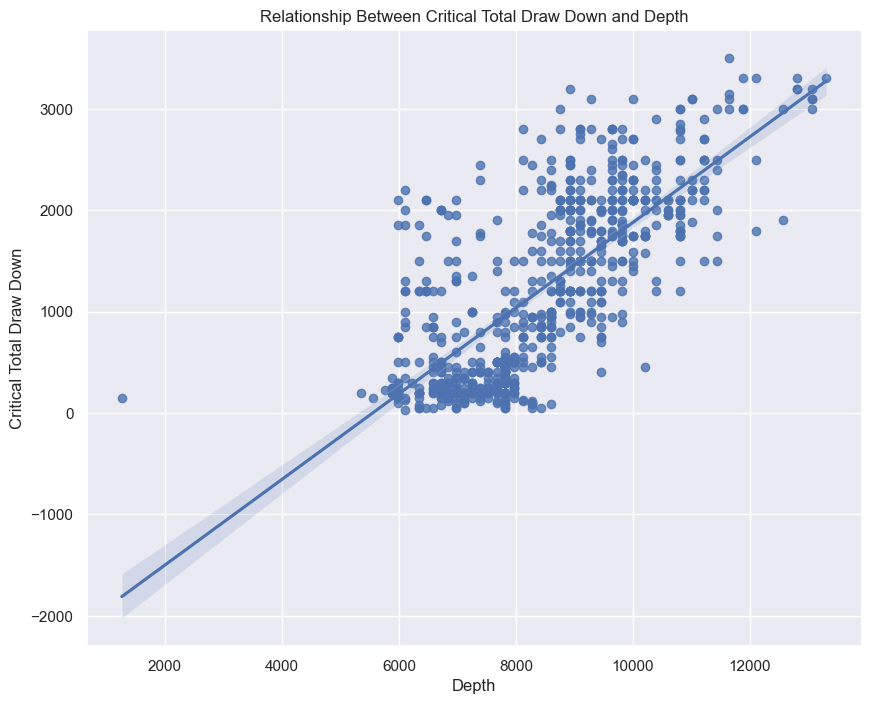

In [505]:
warnings.filterwarnings('ignore', module='seaborn')

plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='depth', y='total_draw_down')
plt.title('Relationship Between Critical Total Draw Down and Depth')
plt.xlabel('Depth')
plt.ylabel('Critical Total Draw Down');

In [506]:
df.total_draw_down.corr(df.depth)

0.7437631798644435

- The more the depth, the more the Critical Total Draw Down

#### What is the relationship between Critical Total Draw Down and Transit Time?

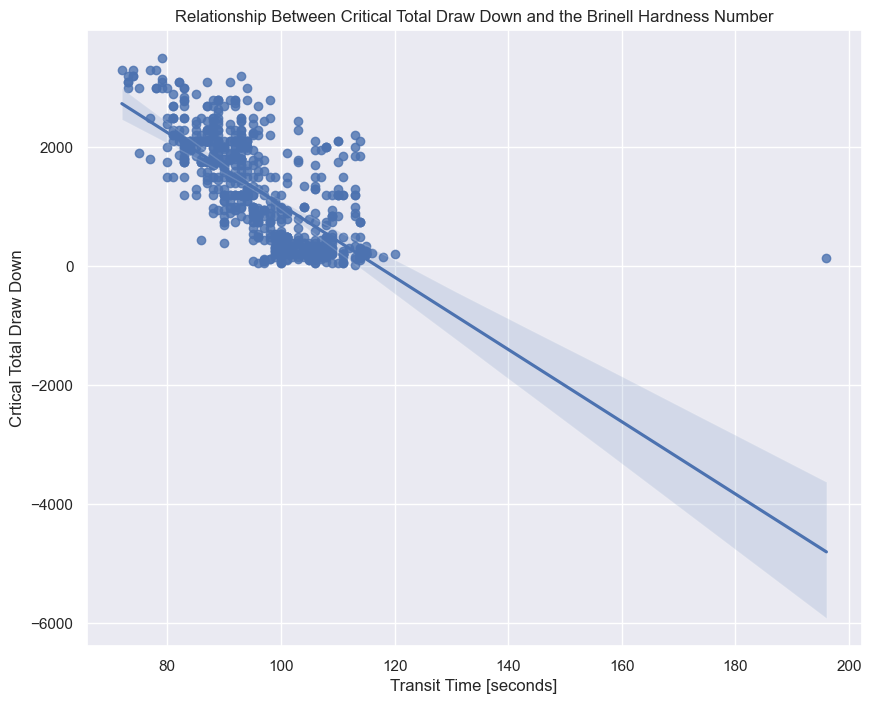

In [507]:
warnings.filterwarnings('ignore', module='seaborn')

plt.figure(figsize=(10, 8))
sns.regplot(data=df, x='transit_time', y='total_draw_down')
plt.title('Relationship Between Critical Total Draw Down and the Brinell Hardness Number')
plt.xlabel('Transit Time [seconds]')
plt.ylabel('Crtical Total Draw Down');

In [508]:
df.total_draw_down.corr(df.transit_time)

-0.7001559488488601

- The Critical Total Draw Down and the Transit Time are negatively correlated

### Are there Outliers in the data??

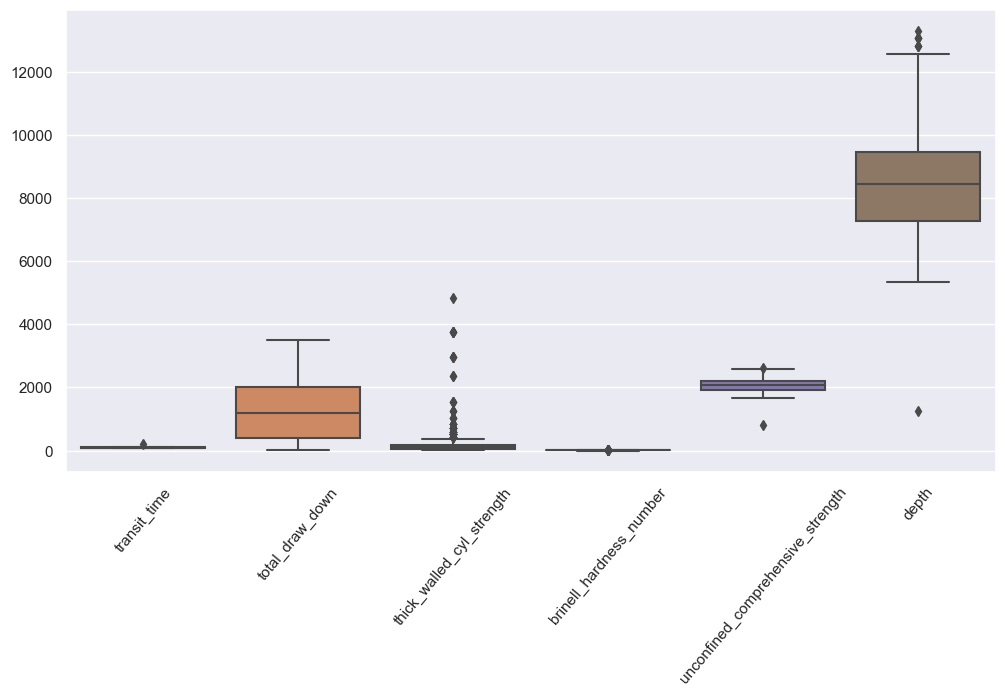

In [509]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df)
plt.xticks(rotation=50);

- From the box plot, the data contains outliers
- The outliers need to be replaced with the maximum and minimum values respectively

In [510]:
# A function to remove outliers using the Inter Quartile Range (IQR) method

def remove_outliers(df, features):
    for feature in features:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)] 
    return df                                                                           

In [511]:
features_to_remove_outliers = ['transit_time', 'total_draw_down', 'thick_walled_cyl_strength',
       'brinell_hardness_number', 'unconfined_comprehensive_strength', 'depth']

df = remove_outliers(df, features_to_remove_outliers)
df.shape

(674, 6)

#### Checking that the outliers have been removed

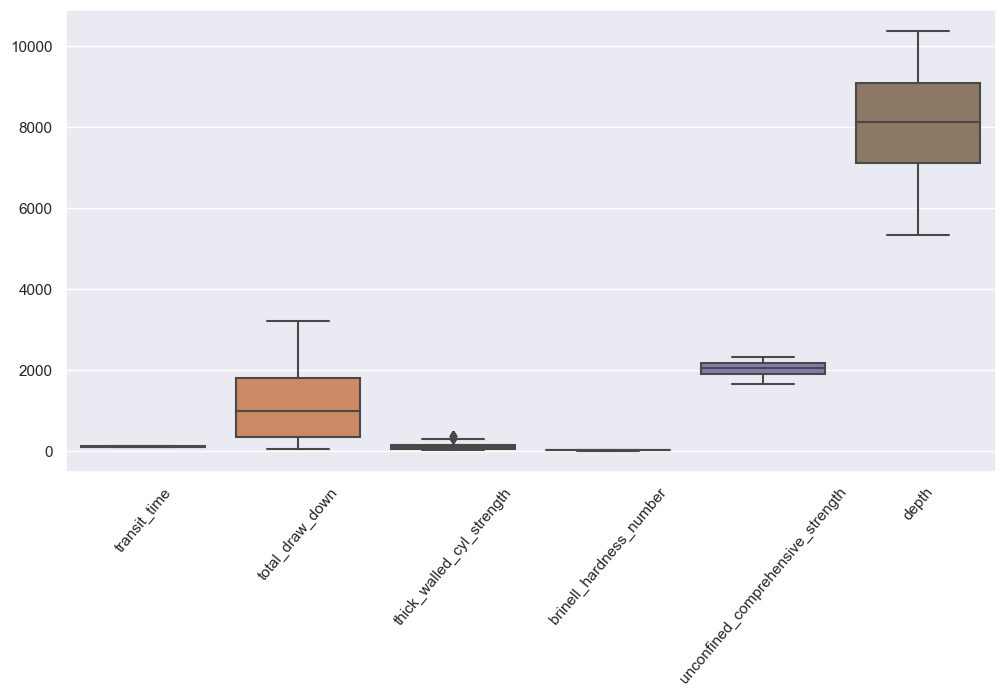

In [512]:
plt.figure(figsize=(12, 6))

sns.boxplot(data=df)
plt.xticks(rotation=50);

### FEATURE ENGINEERING

In [513]:
# What is the data correlation?
df_corr = df.corr()
df_corr

,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
transit_time,1.000000,-0.652541,-0.886063,-0.986887,-0.999265,-0.997066
total_draw_down,-0.652541,1.000000,0.667284,0.685061,0.662196,0.670662
thick_walled_cyl_strength,-0.886063,0.667284,1.000000,0.945837,0.901876,0.916658
brinell_hardness_number,-0.986887,0.685061,0.945837,1.000000,0.992327,0.996325
unconfined_comprehensive_strength,-0.999265,0.662196,0.901876,0.992327,1.000000,0.999267
depth,-0.997066,0.670662,0.916658,0.996325,0.999267,1.000000


In [514]:
# # Adding a new column which is the logarithm of Thick Walled Cylinder Strength
df['log_thick_walled_cyl_strength'] = np.log(df['thick_walled_cyl_strength'])
 df.head()

In [553]:
df.total_draw_down.corr((df.unconfined_comprehensive_strength))

0.67764616375898

In [515]:
 Drop the Thick Walled Cylinder Strength Column

df = df.drop('thick_walled_cyl_strength', axis=1)

In [516]:
df.head()

,transit_time,total_draw_down,thick_walled_cyl_strength,brinell_hardness_number,unconfined_comprehensive_strength,depth
1,114,250,29.620644,4.026963,1752.958059,5990.837748
2,97,120,90.527498,8.085017,2058.326925,8274.936604
3,103,800,55.715313,6.321854,1944.908788,7383.378019
4,97,100,90.527498,8.085017,2058.326925,8274.936604
5,103,120,55.715313,6.321854,1944.908788,7383.378019


### MODEL BUILDING

In [517]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error as mae, mean_squared_error as mse
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.model_selection  import train_test_split

In [518]:
features = df.drop('total_draw_down', axis=1)
target = df['total_draw_down']

In [519]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=112)

In [520]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((539, 5), (135, 5), (539,), (135,))

### Scaling the features

In [524]:
norm = Normalizer()
X_train_scaled = norm.fit_transform(X_train)
X_test_scaled =  norm.transform(X_test)

In [525]:
X_train_scaled[:5]

array([[9.83575217e-03, 1.60597389e-02, 1.06103824e-03, 2.30699526e-01,
        9.72842200e-01],
       [1.04283382e-02, 1.34396462e-02, 1.01434664e-03, 2.34914145e-01,
        9.71866730e-01],
       [1.17052755e-02, 9.88791480e-03, 9.26894723e-04, 2.43538373e-01,
        9.69769776e-01],
       [1.17052755e-02, 9.88791480e-03, 9.26894723e-04, 2.43538373e-01,
        9.69769776e-01],
       [1.13741267e-02, 1.06151673e-02, 9.48041273e-04, 2.41357435e-01,
        9.70311103e-01]])

### HYPERPARAMETER TUNING

In [526]:
# Define the models
models = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor()
}

# Define hyperparameter grids for each model
param_grids = {
    'DecisionTreeRegressor': {'max_depth' : [3, 4, 5, 6], 'min_samples_leaf' : [0.01, 0.02, 0.04, 0.06, 0.08], 'max_features' : [0.4, 0.6, 0.8, 0.9, 1.0]},
    'RandomForestRegressor': {'n_estimators': [10, 50, 100], 'max_depth': [1, 10, 20]},
    'AdaBoostRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'BaggingRegressor': {'n_estimators': [10, 50, 100], 'max_samples': [0.5, 1.0]},
    'GradientBoostingRegressor': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
}

# Perform hyperparameter tuning with k-fold cross-validation
for model_name, model in models.items():
    print(f"\nHyperparameter tuning for {model_name}:")
    
    # Create k-fold cross-validation object
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    
    # Create GridSearchCV object
    grid_search = GridSearchCV(model, param_grid=param_grids[model_name], cv=kfold, scoring='r2', n_jobs=-1)
    
    # Fit the model to the data
    grid_search.fit(X_train_scaled, y_train)
    
    # Display the best hyperparameters and corresponding performance
    print("Best hyperparameters:", grid_search.best_params_)
    print("Best mean squared error:", grid_search.best_score_)
    #print('Best estimator: ', grid_search.best_estimator_)


Hyperparameter tuning for DecisionTreeRegressor:


<IPython.core.display.Javascript object>

Best hyperparameters: {'max_depth': 5, 'max_features': 0.4, 'min_samples_leaf': 0.04}
Best mean squared error: 0.5479712514220654

Hyperparameter tuning for RandomForestRegressor:


<IPython.core.display.Javascript object>

Best hyperparameters: {'max_depth': 10, 'n_estimators': 50}
Best mean squared error: 0.5611098761105155

Hyperparameter tuning for AdaBoostRegressor:


<IPython.core.display.Javascript object>

Best hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}
Best mean squared error: 0.5468147926562391

Hyperparameter tuning for BaggingRegressor:


<IPython.core.display.Javascript object>

Best hyperparameters: {'max_samples': 0.5, 'n_estimators': 50}
Best mean squared error: 0.5652368284276712

Hyperparameter tuning for GradientBoostingRegressor:


<IPython.core.display.Javascript object>

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best mean squared error: 0.5646334249640349


- From the hyperparameter tuning, the Gradient Boosting Regressor performed best
- Therefore, we stick with the Gradient Boosting Regressor

In [529]:
bagging = BaggingRegressor(max_samples=0.5, n_estimators=150)
bagging.fit(X_train_scaled, y_train)

BaggingRegressor(max_samples=0.5, n_estimators=150)

In [533]:
y_train_pred = bagging.predict(X_train_scaled)

r_squared = bagging.score(X_train_scaled, y_train)
print(r_squared)

0.6101980303802623


#### EVALUATION

In [540]:
y_pred = bagging.predict(X_test_scaled)
#print('The Root Mean Squared Error is: ', rmse)
print('The score of the Model is: ', bagging.score(X_test_scaled, y_test))

The score of the Model is:  0.5422013424190231


- The model performed quite well on the validation set
- 54% r_squared score on the testing set and 61% on the training
- This shows that the model did not overfit

### SAVING THE MODEL

In [555]:
import pickle

filename = 'bagging_moodel.pkl'

with open(filename, 'wb') as file:
    pickle.dump(bagging, file)